In [1]:
import jax.numpy as np
import numpy as onp
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)
import pickle
import pandas as pd

from utils import biaxial_relax

NODE

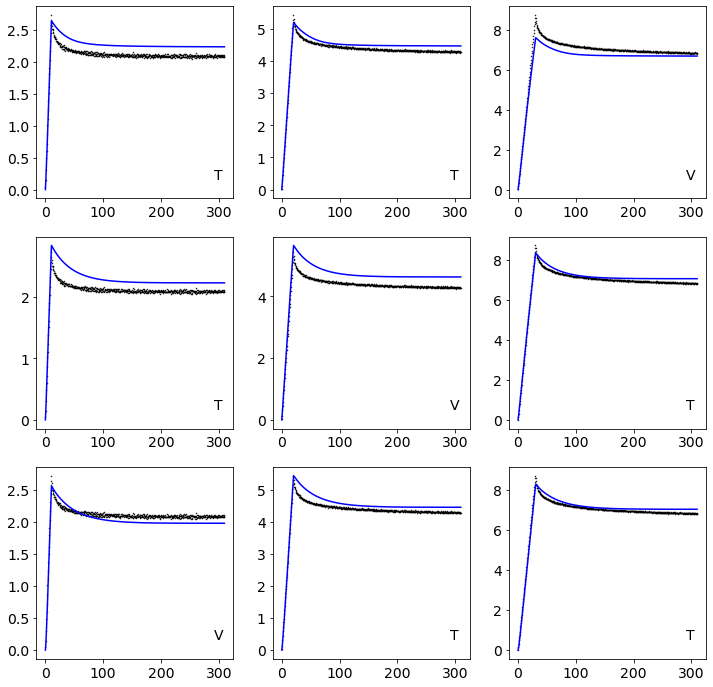

In [2]:
# Save data for TikZ
fig, ax = plt.subplots(3,3,figsize=(12,12))
with open('training_data/manu_bloodclots_short.npy','rb') as f:
    time, lmb_x, lmb_y, sgm_x, sgm_y = pickle.load(f)
labelset = ['abc', 'def', 'ghi']
cases = ['TTV', 'TVT', 'VTT']
t = time[0]
for label, case, axi in zip(labelset, cases, ax):
    with open('saved/bc_'+case+'_params_retrained.npy', 'rb') as f:
        params = pickle.load(f)
    with open('saved/bc_'+case+'_Phi_norm_w.npy', 'rb') as f:
        Phi_norm = pickle.load(f)
        norm = (None, None, Phi_norm)
    for i in range(3):
        sig_NN, lm1_NN, lm2_NN, lm3_NN, lm1e_NN, lm2e_NN, lm3e_NN  = biaxial_relax(params, norm, True, t, lmb_x[i],lmb_y[i], dt0=0.5)
        axi[i].plot(t, sgm_x[i], 'k.', markersize=1)
        axi[i].plot(t,sig_NN[:,0,0],'b-')
        # axi[i].plot(t,sig_NN[:,1,1],'b-')
        # axi[i].plot(t,sig_NN[:,2,2],'g-')
        axi[i].text(0.9,0.1,case[i],transform=axi[i].transAxes)

        #Save to TikZ
        # header = ['x', 'y_gt', 'y_pr']
        # df = pd.DataFrame(np.array([t, sgm_x[i], sig_NN[:,0,0]], dtype=np.float16).T, columns=header)
        # df.to_csv('tikz_data/fig_bc/fig_bc_'+label[i]+'.csv', index=False, sep=' ')

Govindjee's model

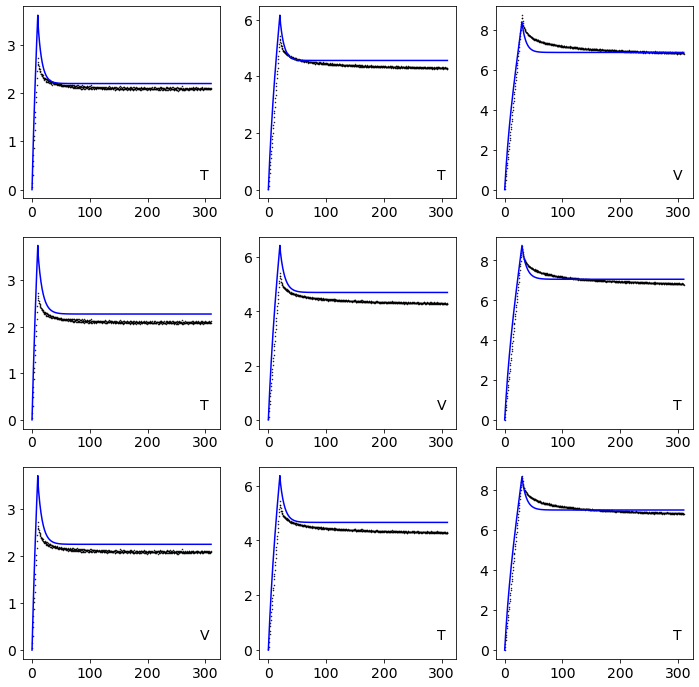

In [3]:
# Save data for TikZ
import pandas as pd
fig, ax = plt.subplots(3,3,figsize=(12,12))
labelset = ['abc', 'def', 'ghi']
cases = ['TTV', 'TVT', 'VTT']
t = time[0]
for label, case, axi in zip(labelset, cases, ax):
    with open('saved/bc_'+case+'_gov_params.npy', 'rb') as f:
        gov_params = pickle.load(f)
    with open('saved/bc_'+case+'_Phi_norm_w.npy', 'rb') as f:
        Phi_norm = pickle.load(f)
        norm = (None, None, Phi_norm)
    for i in range(3):
        sig_NN, lm1_NN, lm2_NN, lm3_NN, lm1e_NN, lm2e_NN, lm3e_NN  = biaxial_relax(gov_params, norm, False, t, lmb_x[i],lmb_y[i])
        axi[i].plot(t, sgm_x[i], 'k.', markersize=1)
        axi[i].plot(t,sig_NN[:,0,0],'b-')
        axi[i].text(0.9,0.1,case[i],transform=axi[i].transAxes)

        # #Save to TikZ
        # header = ['x', 'y_gt', 'y_pr']
        # df = pd.DataFrame(np.array([t, sgm_x[i], sig_NN[:,0,0]], dtype=np.float16).T, columns=header)
        # df.to_csv('tikz_data/fig_bc/fig_bc_gov_'+label[i]+'.csv', index=False, sep=' ')

In [4]:
# Errors
cases = ['TTV', 'TVT', 'VTT']
training = [[0,1], [0,2], [1,2]]
validation = [2,1,0]
labelset = ['abc', 'def', 'ghi']
for case, trn, val, label in zip(cases, training, validation, labelset):
    mae = onp.zeros(3)
    mre = onp.zeros(3)
    data0 = pd.read_csv('tikz_data/fig_bc/fig_bc_'+label[0]+'.csv', sep=' ')
    mae[0] = onp.mean(onp.abs(data0.y_gt-data0.y_pr))
    mre[0] = onp.mean(onp.abs((data0.y_gt-data0.y_pr)/data0.y_gt))
    
    data1 = pd.read_csv('tikz_data/fig_bc/fig_bc_'+label[1]+'.csv', sep=' ')
    mae[1] = onp.mean(onp.abs(data1.y_gt-data1.y_pr))
    mre[1] = onp.mean(onp.abs((data1.y_gt-data1.y_pr)/data1.y_gt))

    data2 = pd.read_csv('tikz_data/fig_bc/fig_bc_'+label[2]+'.csv', sep=' ')
    mae[2] = onp.mean(onp.abs(data2.y_gt-data2.y_pr))
    mre[2] = onp.mean(onp.abs((data2.y_gt-data2.y_pr)/data2.y_gt))

    mae_trn = mae[trn]
    mae_val = mae[val]
    mre_trn = mre[trn]
    mre_val = mre[val]
    print('-------')
    print('case ', case)
    print('Training MAE = ', onp.mean(mae_trn))
    print('Training MRE = ', onp.mean(mre_trn))
    print('Validation MAE = ', onp.mean(mae_val))
    print('Validation MRE = ', onp.mean(mre_val))

-------
case  TTV
Training MAE =  0.03274343800322064
Training MRE =  0.015265628525273873
Validation MAE =  0.43722256038647367
Validation MRE =  0.06991278931111944
-------
case  TVT
Training MAE =  0.05563870370370373
Training MRE =  0.01931902483158717
Validation MAE =  0.19281399355877624
Validation MRE =  0.04731603109249218
-------
case  VTT
Training MAE =  0.07037028985507243
Training MRE =  0.021280518837676385
Validation MAE =  0.20902112721417074
Validation MRE =  0.10531061993849059
